<a href="https://colab.research.google.com/github/DanielResearch/Identificacion-de-Durazno/blob/main/Morfol%C3%B3gicos_Crom%C3%A1ticos6ClasesAB(1_4)8Features(HSV_AB_Roundness__Excentricidad_Version_III_15K)(80vs80vs80vs80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General Setup

In [ ]:
!pip install yellowbrick

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer, precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
from sklearn.model_selection import cross_val_score, StratifiedKFold,  StratifiedShuffleSplit
from sklearn.metrics import multilabel_confusion_matrix, precision_recall_fscore_support, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing  import StandardScaler, label_binarize
from sklearn import metrics
from time import time
from scipy import interp
from itertools import cycle
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from yellowbrick.model_selection import ValidationCurve

In [ ]:
def plotAucRoc(y_test,y_score,n_classes = 6):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
  mean_tpr /= n_classes
  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
  lw = 2
  plt.figure()
  #plt.figure(figsize=(3.937, 2.9527))
  #plt.plot(fpr["micro"], tpr["micro"],
        # label='promedio micro curva ROC (área = {0:0.2f})'
             # ''.format(roc_auc["micro"]),
        # color='deeppink', linestyle=':', linewidth=4)
  plt.plot(fpr["macro"], tpr["macro"],
         label='promedio macro curva ROC  (área = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
  clases = ['V1','V2','V3','V4']
  colors = cycle(['aqua', 'darkorange', 'cornflowerblue','green'])
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC {0} (área = {1:0.2f})'
             ''.format(clases[i], roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Tasa de Falsos Positivos')
  plt.ylabel('Tasa de Verdaderos Positivos')
  #plt.legend(loc="lower right")
  plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
  plt.show()

In [ ]:
def Metrics(y_truev,y_scored,n=6):
  #print("\nMatriz de Confusión\n")
  #print(metrics.confusion_matrix(y_true=y_truev,y_pred=y_scored))
  #print("\n Reporte de Métricas de Clasificación \n")
  #print(metrics.classification_report(y_true=y_truev,y_pred=y_scored,digits = n))
  #return metrics.confusion_matrix(y_true=y_truev,y_pred=y_scored)
  return metrics.classification_report(y_true=y_truev,y_pred=y_scored,digits = n, output_dict= True)
  '''
  macro_roc_auc_ovo = roc_auc_score(y_true= convert_to_one_hot(y_truev-1, n),y_score = convert_to_one_hot(y_scored-1, n), multi_class="ovo",
                                  average="macro")
  weighted_roc_auc_ovo = roc_auc_score(y_true= convert_to_one_hot(y_truev-1, n),y_score = convert_to_one_hot(y_scored-1, n), multi_class="ovo",
                                     average="weighted")
  macro_roc_auc_ovr = roc_auc_score(y_true= convert_to_one_hot(y_truev-1, n),y_score = convert_to_one_hot(y_scored-1, n), multi_class="ovr",
                                  average="macro")
  weighted_roc_auc_ovr = roc_auc_score(y_true= convert_to_one_hot(y_truev-1, n),y_score = convert_to_one_hot(y_scored-1, n), multi_class="ovr",
                                     average="weighted")
  print("\n AUC ROC \n")
  print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
  print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

  '''

In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [ ]:
scoring = {'prec_weighted': make_scorer(precision_score, average='macro'),
          'rec_weighted': make_scorer(recall_score, average='macro'),
          'f1_weighted': make_scorer(f1_score, average='macro'),
          'acc_weighted': make_scorer(accuracy_score)}

Hiperparámetros SVM

In [ ]:

##param_rangeC = [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0 ,10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 1000.0]
#param_rangeGammaRBF = [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0 ,10.0, 100.0, 1000.0]


param_rangeC = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_rangeGamma = [0.0001, 0.001, 0.01, 0.1, 1.0,10.0, 100.0, 1000.0]

param_grid_A = [{'svc__C': param_rangeC,'svc__gamma': param_rangeGamma,'svc__kernel': ['rbf']}]

param_grid_B = [{'svc__C': param_rangeC, 'svc__gamma': param_rangeGamma, 'svc__degree':[2] ,'svc__kernel': ['poly']} ]

## A) lineal rbf sigmoidal
## B) precomputed poly
## D) A vs B

Hiperparámetros RF

In [ ]:
n_estimators = [50, 100, 150, 200]
criterion = ['gini','entropy']
max_depth =  [10, 15, 20, 'None']

param_grid_rf ={'max_depth': max_depth,
                'n_estimators': n_estimators,
               'criterion': criterion}

Hiperparámetros MLP

In [ ]:
activation = ['relu','tanh']
hidden_layer_sizes = [(50,) , (100,), (150,), (200,) ]
solver = [ 'sgd', 'adam']
max_iter = [200,500]
alpha = [0.001,0.01, 0.5, 'default']

param_grid_mlp_NEW  = {'mlpclassifier__activation': activation,
                'mlpclassifier__hidden_layer_sizes': hidden_layer_sizes,
               'mlpclassifier__solver': solver,
               'mlpclassifier__max_iter': max_iter,
               'mlpclassifier__alpha': alpha}

# Cargar conjunto de datos

El conjunto de datos esta dividido de la siguiente manera (por columnas)


1.   Clase (1-6)
2.   Ancho
3.   Alto
4.   Área
5.   Perímetro
6.   Redondez
7.   Excentricidad
8.   Proporción Ancho-Alto
9.   Hu $m_1$
10.  Hu $m_2$
11.  Hu $m_3$
12.  Hu $m_4$
13.  Hu $m_5$
14. Hu $m_6$
15. Hu $m_7$

Vamos a trabajar con las caracterísiticas del 2 al 8.

In [ ]:
dataSet = np.load('/content/drive/MyDrive/Paper2021/Datasets/Muestras de Color/3muestras/Train_DataSetDepuradoVsAll_HSV_Morfologicos_15K_6clases_V3.npy')

In [ ]:
dataSet.shape

(90000, 19)

Exclusivo de A conjunto de datos con los que el modelo no entrenó en CV.

In [ ]:
Test_Remain = np.load('/content/drive/MyDrive/Paper2021/Datasets/Muestras de Color/3muestras/Test_Sobrante_DataSetDepuradoVsAll_HSV_Morfologicos_15K_6clases_V3.npy')

## Distribución de los datos

### Test Sobrante 100%

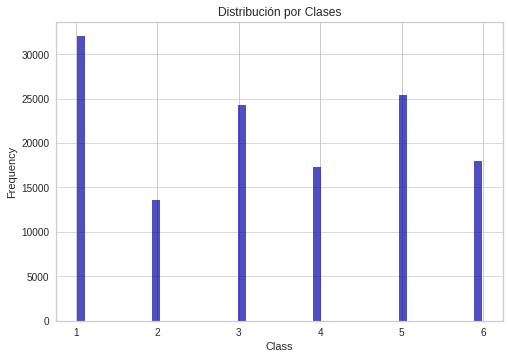

[32039.     0.     0.     0.     0.     0.     0.     0. 13599.     0.
     0.     0.     0.     0.     0.     0.     0. 24289.     0.     0.
     0.     0.     0.     0.     0. 17309.     0.     0.     0.     0.
     0.     0.     0.     0. 25395.     0.     0.     0.     0.     0.
     0.     0. 17937.]


In [ ]:
n, bins, patches = plt.hist(x=Test_Remain[:,0], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribución por Clases')
plt.show()
print(n)

### Clases 100%

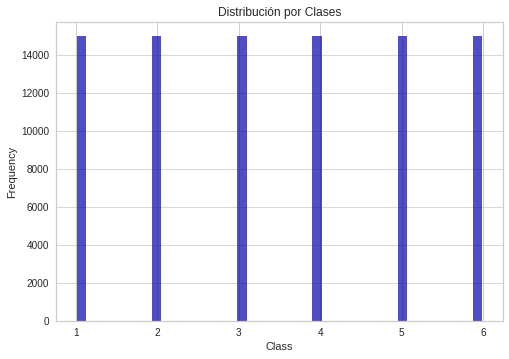

[15000.     0.     0.     0.     0.     0.     0. 15000.     0.     0.
     0.     0.     0.     0.     0. 15000.     0.     0.     0.     0.
     0.     0. 15000.     0.     0.     0.     0.     0.     0.     0.
 15000.     0.     0.     0.     0.     0.     0. 15000.]


In [ ]:
n, bins, patches = plt.hist(x=dataSet[:,0], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribución por Clases')
plt.show()
print(n)

# Creación de conjuntos de datos  **A**

vamos a trabajar con los colores HSV de A y redondez

In [ ]:
dataSet2 = dataSet[dataSet[:,1] == 1,:]

C1 = dataSet2[dataSet2[:,0] == 1,2:5]  ## HSV
C1 = np.append( C1, dataSet2[dataSet2[:,0] == 1, 9:11 ], axis = 1 )  ## Redondez Excentricidad
YA = dataSet2[dataSet2[:,0] == 1,0]

C2 = dataSet2[dataSet2[:,0] == 2,2:5]
C2 = np.append( C2, dataSet2[dataSet2[:,0] == 2, 9:11 ], axis = 1 )
YA = np.append(YA,dataSet2[dataSet2[:,0] == 2,0])

C3 = dataSet2[dataSet2[:,0] == 3,2:5]
C3 = np.append( C3, dataSet2[dataSet2[:,0] == 3, 9:11 ], axis = 1 )
YA = np.append(YA,dataSet2[dataSet2[:,0] == 3,0])

C4 = dataSet2[dataSet2[:,0] == 4,2:5]
C4 = np.append( C4, dataSet2[dataSet2[:,0] == 4, 9:11 ], axis = 1 )
YA = np.append(YA,dataSet2[dataSet2[:,0] == 4,0])

C5 = dataSet2[dataSet2[:,0] == 5,2:5]
C5 = np.append( C5, dataSet2[dataSet2[:,0] == 5, 9:11 ], axis = 1 )
YA = np.append(YA,dataSet2[dataSet2[:,0] == 5,0])

C6 = dataSet2[dataSet2[:,0] == 6,2:5]
C6 = np.append( C6, dataSet2[dataSet2[:,0] == 6, 9:11 ], axis = 1 )
YA = np.append(YA,dataSet2[dataSet2[:,0] == 6,0])

XA = C1
XA = np.append(XA,C2, axis = 0)
XA = np.append(XA,C3, axis = 0)
XA = np.append(XA,C4, axis = 0)
XA = np.append(XA,C5, axis = 0)
XA = np.append(XA,C6, axis = 0)
YA = YA.astype(int)
print(XA.shape)
print(YA.shape)

(90000, 5)
(90000,)


In [ ]:
XA[0]

array([0.23511905, 0.68292683, 0.32156863, 2.3587279 , 0.96087674])

In [ ]:
YA.shape

(90000,)

In [ ]:
np.asarray([1, 6]).shape

(2,)

### Datos entrenamiento y test 80-20

In [ ]:
x_trainA, x_testA, y_trainA, y_testA = train_test_split(XA,YA, test_size=0.2, stratify = YA , random_state=42)

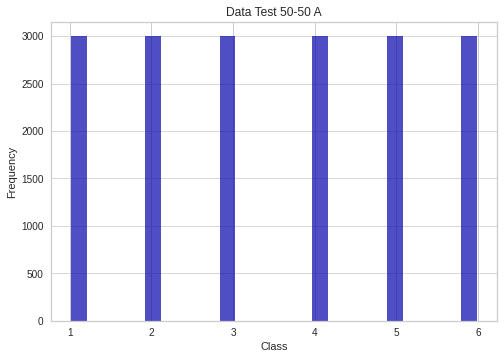

[3000.    0.    0.    0. 3000.    0.    0.    0. 3000.    0.    0.    0.
    0. 3000.    0.    0.    0. 3000.    0.    0.    0. 3000.]


In [ ]:
n, bins, patches = plt.hist(x=y_testA, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Data Test 50-50 A')
plt.show()
print(n)

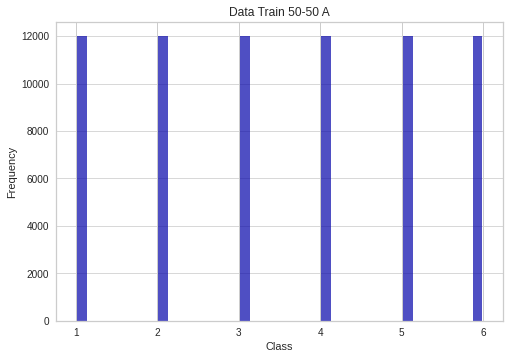

[12000.     0.     0.     0.     0.     0.     0. 12000.     0.     0.
     0.     0.     0.     0. 12000.     0.     0.     0.     0.     0.
     0. 12000.     0.     0.     0.     0.     0.     0. 12000.     0.
     0.     0.     0.     0. 12000.]


In [ ]:
n, bins, patches = plt.hist(x=y_trainA, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Data Train 50-50 A')
plt.show()
print(n)

### Datos 100

In [ ]:
XA = np.append(x_trainA,x_testA,axis=0)
YA = np.append(y_trainA,y_testA,axis=0)
print(YA.shape)
print(XA.shape)

(90000,)
(90000, 5)


### Stratified Splits

In [ ]:
cvA = StratifiedShuffleSplit(n_splits=10, random_state=42)
crossVA = cvA.split(XA,YA)

In [ ]:
for train_index, test_index in crossVA:
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [22415 65274 62534 ... 58845 85937  8826] TEST: [64323 52378 25667 ...  5183 64464 63996]
TRAIN: [ 8435 49362 25136 ... 55886 30889 77329] TEST: [42103 35895 55880 ... 87705  3565 53228]
TRAIN: [70222 84007 19649 ... 75934 13726 67737] TEST: [49540 21973 30794 ... 20047 30735 11858]
TRAIN: [57250 51355 83488 ... 56031   523 38493] TEST: [ 9390 37210 54776 ... 38674 70438 44379]
TRAIN: [86184 55476 77346 ... 79287 15322 35627] TEST: [18496 73385 78371 ... 40438   620 51818]
TRAIN: [27592 41751 42146 ... 37361 69700 12006] TEST: [80083 10961 51618 ... 59682 78252 44671]
TRAIN: [80390 11564 49055 ... 33399 81175 54694] TEST: [33393 50809 23666 ... 38620 40469 75241]
TRAIN: [  533  9784 33328 ...  8633 25431 88422] TEST: [83362 43396 59680 ... 60429 75809 28920]
TRAIN: [24553 35807 36013 ... 56583 87614 18040] TEST: [26814 19753 37336 ... 22331 29537 30886]
TRAIN: [30407 61973  5135 ... 52509 61793 49926] TEST: [52965 64800 27319 ... 30211  1094 89486]


In [ ]:
for train_index, test_index in crossVA:
    print("TRAIN:", train_index, "TEST:", test_index)

### Test Sobrante


In [ ]:
Test_Remain2 = Test_Remain[Test_Remain[:,1] == 1,:]

C1_TS = Test_Remain2[Test_Remain2[:,0] == 1,2:5]
C1_TS = np.append( C1_TS, Test_Remain2[Test_Remain2[:,0] == 1, 9:11 ], axis = 1 )  ## Redondez Excentricidad
YA_TS = Test_Remain2[Test_Remain2[:,0] == 1,0]

C2_TS = Test_Remain2[Test_Remain2[:,0] == 2,2:5]
C2_TS = np.append( C2_TS, Test_Remain2[Test_Remain2[:,0] == 2, 9:11 ], axis = 1 )
YA_TS = np.append(YA_TS,Test_Remain2[Test_Remain2[:,0] == 2,0])

C3_TS = Test_Remain2[Test_Remain2[:,0] == 3,2:5]
C3_TS = np.append( C3_TS, Test_Remain2[Test_Remain2[:,0] == 3, 9:11 ], axis = 1 )
YA_TS = np.append(YA_TS,Test_Remain2[Test_Remain2[:,0] == 3,0])

C4_TS = Test_Remain2[Test_Remain2[:,0] == 4,2:5]
C4_TS = np.append( C4_TS, Test_Remain2[Test_Remain2[:,0] == 4, 9:11 ], axis = 1 )
YA_TS = np.append(YA_TS,Test_Remain2[Test_Remain2[:,0] == 4,0])

C5_TS = Test_Remain2[Test_Remain2[:,0] == 5,2:5]
C5_TS = np.append( C5_TS, Test_Remain2[Test_Remain2[:,0] == 5, 9:11 ], axis = 1 )
YA_TS = np.append(YA_TS,Test_Remain2[Test_Remain2[:,0] == 5,0])

C6_TS = Test_Remain2[Test_Remain2[:,0] == 6,2:5]
C6_TS = np.append( C6_TS, Test_Remain2[Test_Remain2[:,0] == 6, 9:11 ], axis = 1 )
YA_TS = np.append(YA_TS,Test_Remain2[Test_Remain2[:,0] == 6,0])

XA_TS = C1_TS
XA_TS = np.append(XA_TS,C2_TS, axis = 0)
XA_TS = np.append(XA_TS,C3_TS, axis = 0)
XA_TS = np.append(XA_TS,C4_TS, axis = 0)
XA_TS = np.append(XA_TS,C5_TS, axis = 0)
XA_TS = np.append(XA_TS,C6_TS, axis = 0)
YA_TS= YA_TS.astype(int)

print(XA_TS.shape)
print(YA_TS.shape)

(130568, 5)
(130568,)


# **SVM A**

### GridSearch  80-20

In [ ]:
###cv=5
pipe_svc_1_91_A = make_pipeline(StandardScaler(),SVC(random_state=1))
gs_1_91_A = GridSearchCV(estimator=pipe_svc_1_91_A,param_grid=param_grid_A,scoring='accuracy',cv=5,n_jobs=-1)
start_time = time()
gs_1_91_A = gs_1_91_A.fit(x_trainA, y_trainA)
elapsed_time = time() - start_time
print("Tiempo transcurrido: %0.10f segundos." % elapsed_time)
print(gs_1_91_A.best_score_)
print(gs_1_91_A.best_params_)
paramSVCA = gs_1_91_A.best_params_

Tiempo transcurrido: 35030.1460080147 segundos.
0.7826888888888889
{'svc__C': 100.0, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}


In [ ]:
paramSVCA = {'svc__C': 100.0, 'svc__gamma': 10.0, 'svc__kernel': 'rbf'}

In [ ]:
pred_A_1_Grid_91 = gs_1_91_A.predict(x_testA)
Metrics(y_testA.astype(int),pred_A_1_Grid_91.astype(int),n=6)

####  Cross_Validate

In [ ]:
#### cv = 10  100%
cvA = StratifiedShuffleSplit(n_splits=10, random_state=42)
crossVA = cvA.split(XA,YA)
start_time = time()
pipe_svc_K_91_A = make_pipeline(StandardScaler(),SVC(kernel=paramSVCA['svc__kernel'],random_state=1,gamma=paramSVCA['svc__gamma'], C = paramSVCA['svc__C']))
scores = cross_validate(estimator=pipe_svc_K_91_A,X=XA,y=YA, return_estimator= True ,scoring = scoring ,cv=crossVA,n_jobs=-1)
elapsed_time = time() - start_time
print("Tiempo transcurrido: %0.10f segundos." % elapsed_time)
#print('CV scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_acc_weighted']),np.std(scores['test_acc_weighted'])))
print('CV f1: %.3f +/- %.3f' % (np.mean(scores['test_f1_weighted']),np.std(scores['test_f1_weighted'])))
print('CV prec: %.3f +/- %.3f' % (np.mean(scores['test_prec_weighted']),np.std(scores['test_prec_weighted'])))
print('CV rec: %.3f +/- %.3f' % (np.mean(scores['test_rec_weighted']),np.std(scores['test_rec_weighted'])))
print("\n\t\tAccuracy\n")
print(scores['test_acc_weighted'])
print("\n\t\t F1 \n")
print(scores['test_f1_weighted'])
print("\n\t\t Prec \n")
print(scores['test_prec_weighted'])
print("\n\t\t Rec \n")
print(scores['test_rec_weighted'])

Tiempo transcurrido: 4826.1154186726 segundos.
CV accuracy: 0.822 +/- 0.004
CV f1: 0.823 +/- 0.004
CV prec: 0.825 +/- 0.004
CV rec: 0.822 +/- 0.004

		Accuracy

[0.82566667 0.82188889 0.81566667 0.82544444 0.82644444 0.82488889
 0.82388889 0.82211111 0.82244444 0.81377778]

		 F1 

[0.82645297 0.82254111 0.81650481 0.82617816 0.8271921  0.82556135
 0.82450787 0.82272633 0.82335425 0.81450108]

		 Prec 

[0.82808448 0.82429271 0.81820022 0.82785303 0.828736   0.82722565
 0.82593655 0.82380812 0.82522565 0.81600361]

		 Rec 

[0.82566667 0.82188889 0.81566667 0.82544444 0.82644444 0.82488889
 0.82388889 0.82211111 0.82244444 0.81377778]


Sobre el conjunto de datos faltante

In [ ]:
modelsSVM_A = scores['estimator']

for i in range(len(modelsSVM_A)):
  pred_model_SVM_CV_A =  modelsSVM_A[i].predict(XA_TS)
  print("\t\t\t K="+str(i))
  Metrics(YA_TS.astype(int),pred_model_SVM_CV_A.astype(int),6)
  print("\n\n")

Sobre las aprticiones reales de Cv

In [ ]:
i=0
cvA = StratifiedShuffleSplit(n_splits=10, random_state=42)
crossVA = cvA.split(XA,YA)
acumulado = 0
for train_index, test_index in crossVA:
  model_91_A = make_pipeline(StandardScaler(), SVC(kernel=paramSVCA['svc__kernel'],random_state=1,gamma=paramSVCA['svc__gamma'], C = paramSVCA['svc__C']))
  model_91_A.fit(XA[train_index],YA[train_index])
  pred_model_91_A =  model_91_A.predict(XA[test_index])
  print("\t\t\t K="+str(i))
  Metrics(YA[test_index].astype(int),pred_model_91_A.astype(int),6)
  suma = metrics.confusion_matrix(y_true=YA[test_index].astype(int),y_pred=pred_model_91_A.astype(int))
  acumulado = acumulado + suma
  i+=1
  print(acumulado)

			 K=0
[[1313   47   37   49   27   27]
 [  15 1232   12   76   86   79]
 [  40   12 1296   50   30   72]
 [  24  124   38 1193   73   48]
 [  10   99   27  102 1198   64]
 [  12  110   53   80   46 1199]]
			 K=1
[[2639   95   77   94   45   50]
 [  29 2479   24  144  161  163]
 [  82   21 2592   99   57  149]
 [  49  273   62 2377  151   88]
 [  24  201   56  226 2354  139]
 [  36  209   97  158  113 2387]]
			 K=2
[[3950  140  124  150   68   68]
 [  43 3689   42  236  234  256]
 [ 114   31 3891  146   82  236]
 [  64  397  104 3556  231  148]
 [  32  307   72  340 3533  216]
 [  54  311  169  239  177 3550]]
			 K=3
[[5262  184  164  203   90   97]
 [  57 4928   61  318  297  339]
 [ 149   37 5178  194  125  317]
 [  79  512  136 4770  306  197]
 [  47  418   94  436 4710  295]
 [  72  401  229  317  231 4750]]
			 K=4
[[6583  226  206  248  110  127]
 [  78 6142   81  409  369  421]
 [ 187   49 6477  241  155  391]
 [  92  638  171 5978  383  238]
 [  56  516  113  557 5890  368]

#### Modelo

In [ ]:
model_91_A = make_pipeline(StandardScaler(), SVC(kernel=paramSVCA['svc__kernel'],random_state=1,gamma=paramSVCA['svc__gamma'], C = paramSVCA['svc__C']))
model_91_A.fit(x_trainA, y_trainA)
pred_model_91_A = model_91_A.predict(x_testA)
Metrics(y_testA.astype(int),pred_model_91_A.astype(int),n=6)

#### Modelo + AUC ROC

In [ ]:
model_A_91 = make_pipeline(StandardScaler(), SVC(kernel=paramSVCA['svc__kernel'],random_state=1,gamma=paramSVCA['svc__gamma'], C = paramSVCA['svc__C']))
classifier = OneVsRestClassifier(model_A_91, n_jobs=-1)
y_score = classifier.fit(x_trainA, y_train_AUCROC_A).decision_function(x_testA)
plotAucRoc(y_test_AUCROC_A,y_score,6)

#### Modelo Manual

In [ ]:
kernel_A = 'rbf'
gamma_A = 10.0
C_A = 10.0

In [ ]:
model_A_91 = make_pipeline(StandardScaler(), SVC(kernel=kernel_A,random_state=1,gamma=gamma_A, C = C_A))
classifier = OneVsRestClassifier(model_A_91, n_jobs=-1)
start_time = time()
y_score = classifier.fit(x_trainA, y_train_AUCROC_A).decision_function(x_testA)
elapsed_time = time() - start_time
print("Tiempo transcurrido: %0.10f segundos." % elapsed_time)
plotAucRoc(y_test_AUCROC_A,y_score,4)

In [ ]:
model_91_A = make_pipeline(StandardScaler(), SVC(kernel=kernel_A,random_state=1,gamma=gamma_A, C = C_A))
classifier = OneVsRestClassifier(model_91_A, n_jobs=-1)
start_time = time()
classifier.fit(x_trainA, y_trainA)
elapsed_time = time() - start_time
pred_model_91_A = classifier.predict(x_testA)
Metrics(y_testA.astype(int),pred_model_91_A.astype(int),n=4)

# **RANDOM FOREST A**

### GridSearch 80-20

In [ ]:
RF_91_A.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

In [ ]:
## For pipeline

n_estimators = [50, 100, 150, 200]
criterion = ['gini','entropy']
max_depth =  [10, 15, 20, 'None']

param_grid_rf ={'randomforestclassifier__max_depth': max_depth,
                'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__criterion': criterion}

In [ ]:
RF_91_A =  make_pipeline( StandardScaler(), RandomForestClassifier(random_state = 42) )

gs_RF_91_A = GridSearchCV(estimator=RF_91_A,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
start_time = time()
gs_RF_91_A = gs_RF_91_A.fit(x_trainA, y_trainA)
elapsed_time = time() - start_time
print("Tiempo transcurrido: %0.10f segundos." % elapsed_time)
print(gs_RF_91_A.best_score_)
print(gs_RF_91_A.best_params_)
paramRFA = gs_RF_91_A.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packa

Tiempo transcurrido: 718.4422216415 segundos.
0.9993333333333334
{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 200}


In [ ]:
#Tiempo transcurrido: 833.1541941166 segundos.  Sin Escalado
#0.9986
#{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 150}

In [ ]:
#Tiempo transcurrido: 718.4422216415 segundos.  CON ESCALADO (pipeline)
#0.9993333333333334
#{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 200}

In [ ]:
pred_RF_Grid_91_A = gs_RF_91_A.predict(x_testA)
Metrics(y_testA.astype(int),pred_RF_Grid_91_A.astype(int),6)

In [ ]:
## hiperparamémetros con escalado
paramRFA = {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 200}

####  Cross_Validate

In [ ]:
#### cv = 10  100%
cvA = StratifiedShuffleSplit(n_splits=10, random_state=42)
crossVA = cvA.split(XA,YA)
# sin escalado
# kf_RF_91_A = RandomForestClassifier(criterion=paramRFA['criterion'],max_depth= paramRFA['max_depth'], n_estimators = paramRFA['n_estimators'] ,random_state = 42)
# con escalado
kf_RF_91_A =  make_pipeline( StandardScaler(), RandomForestClassifier(random_state = 42) )
start_time = time()
scores = cross_validate(estimator=kf_RF_91_A ,X=XA,y=YA, scoring = scoring, return_estimator= True ,cv = crossVA,n_jobs=-1)
elapsed_time = time() - start_time
print("Tiempo transcurrido: %0.10f segundos." % elapsed_time)
#print('CV scores: %s' % scores)
print('CV accuracy: %.6f +/- %.6f' % (np.mean(scores['test_acc_weighted']),np.std(scores['test_acc_weighted'])))
print('CV f1: %.6f +/- %.6f' % (np.mean(scores['test_f1_weighted']),np.std(scores['test_f1_weighted'])))
print('CV prec: %.6f +/- %.6f' % (np.mean(scores['test_prec_weighted']),np.std(scores['test_prec_weighted'])))
print('CV rec: %.6f +/- %.6f' % (np.mean(scores['test_rec_weighted']),np.std(scores['test_rec_weighted'])))
print("\n\t\tAccuracy\n")
print(scores['test_acc_weighted'])
print("\n\t\t F1 \n")
print(scores['test_f1_weighted'])
print("\n\t\t Prec \n")
print(scores['test_prec_weighted'])
print("\n\t\t Rec \n")
print(scores['test_rec_weighted'])


Tiempo transcurrido: 64.9694068432 segundos.
CV accuracy: 0.999578 +/- 0.000221
CV f1: 0.999578 +/- 0.000221
CV prec: 0.999578 +/- 0.000221
CV rec: 0.999578 +/- 0.000221

		Accuracy

[0.99933333 0.99922222 0.99955556 1.         0.99966667 0.99988889
 0.99955556 0.99955556 0.99944444 0.99955556]

		 F1 

[0.99933337 0.99922215 0.99955556 1.         0.99966667 0.99988889
 0.99955556 0.99955559 0.9994443  0.99955552]

		 Prec 

[0.99933393 0.99922244 0.99955629 1.         0.99966674 0.99988896
 0.99955585 0.99955615 0.99944511 0.999556  ]

		 Rec 

[0.99933333 0.99922222 0.99955556 1.         0.99966667 0.99988889
 0.99955556 0.99955556 0.99944444 0.99955556]


Sobre el conjunto de datos faltante

In [ ]:
modelsRF_A = scores['estimator']

for i in range(len(modelsRF_A)):
  pred_model_rf_CV_A =  modelsRF_A[i].predict(XA_TS)
  print("\t\t\t K="+str(i))
  Metrics(YA_TS.astype(int),pred_model_rf_CV_A.astype(int),6)
  print("\n\n")

			 K=0



			 K=1



			 K=2



			 K=3



			 K=4



			 K=5



			 K=6



			 K=7



			 K=8



			 K=9





Sobre las particiones Reales de CV

In [ ]:
i=0
cvA = StratifiedShuffleSplit(n_splits=10, random_state=42)
crossVA = cvA.split(XA,YA)
for train_index, test_index in crossVA:
  Modelo_rf_91_A = RandomForestClassifier(criterion=paramRFA['criterion'],max_depth= paramRFA['max_depth'], n_estimators = paramRFA['n_estimators'] ,random_state = 42)
  Modelo_rf_91_A.fit(XA[train_index],YA[train_index])
  pred_model_rf_91_A =  Modelo_rf_91_A.predict(XA[test_index])
  print("\t\t\t K="+str(i))
  Metrics(YA[test_index].astype(int),pred_model_rf_91_A.astype(int),6)
  i+=1
  print("\n\n")

			 K=0



			 K=1



			 K=2



			 K=3



			 K=4



			 K=5



			 K=6



			 K=7



			 K=8



			 K=9





In [ ]:
i=0
cvA = StratifiedShuffleSplit(n_splits=10, random_state=42)
crossVA = cvA.split(XA,YA)
acumulado = 0
for train_index, test_index in crossVA:
  #Modelo_rf_91_A = RandomForestClassifier(criterion=paramRFA['criterion'],max_depth= paramRFA['max_depth'], n_estimators = paramRFA['n_estimators'] ,random_state = 42)
  Modelo_rf_91_A = RandomForestClassifier(criterion='entropy',max_depth= 20, n_estimators = 150 ,random_state = 42)
  Modelo_rf_91_A.fit(XA[train_index],YA[train_index])
  pred_model_rf_91_A =  Modelo_rf_91_A.predict(XA[test_index])
  print("\t\t\t K="+str(i))
  #suma = Metrics(YA[test_index].astype(int),pred_model_rf_91_A.astype(int),6)
  suma = metrics.confusion_matrix(y_true=YA[test_index].astype(int),y_pred=pred_model_rf_91_A.astype(int))
  acumulado = acumulado + suma
  i+=1
  print("\n\n")
print(acumulado)

			 K=0



			 K=1



			 K=2



			 K=3



			 K=4



			 K=5



			 K=6



			 K=7



			 K=8



			 K=9



[[14992     0     0     6     2     0]
 [    0 14998     0     0     1     1]
 [    0     0 14999     1     0     0]
 [    2     3     1 14991     2     1]
 [    1     0     1     0 14998     0]
 [    1     2     7     2     1 14987]]


In [ ]:
i=0
cvA = StratifiedShuffleSplit(n_splits=10, random_state=42)
crossVA = cvA.split(XA,YA)
acumulado1 = 0
acumulado2 = 0
acumulado3 = 0
acumulado4 = 0
acumulado5 = 0
acumulado6 = 0
for train_index, test_index in crossVA:
  Modelo_rf_91_A = RandomForestClassifier(criterion=paramRFA['criterion'],max_depth= paramRFA['max_depth'], n_estimators = paramRFA['n_estimators'] ,random_state = 42)
  Modelo_rf_91_A.fit(XA[train_index],YA[train_index])
  pred_model_rf_91_A =  Modelo_rf_91_A.predict(XA[test_index])
  print("\t\t\t K="+str(i))
  #suma = Metrics(YA[test_index].astype(int),pred_model_rf_91_A.astype(int),6)
  dic = Metrics(YA[test_index].astype(int),pred_model_rf_91_A.astype(int),6)
  acumulado1 = dic['1']['f1-score'] + acumulado1
  acumulado2 = dic['2']['f1-score'] + acumulado2
  acumulado3 = dic['3']['f1-score'] + acumulado3
  acumulado4 = dic['4']['f1-score'] + acumulado4
  acumulado5 = dic['5']['f1-score'] + acumulado5
  acumulado6 = dic['6']['f1-score'] + acumulado6
  i+=1
  print("\n\n")


			 K=0



			 K=1



			 K=2



			 K=3



			 K=4



			 K=5



			 K=6



			 K=7



			 K=8



			 K=9





In [ ]:
print("1 \n")
print(acumulado1/10)
print("2 \n")
print(acumulado2/10)
print("3 \n")
print(acumulado3/10)
print("4 \n")
print(acumulado4/10)
print("5 \n")
print(acumulado5/10)
print("6 \n")
print(acumulado6/10)
print("promedio\n")
prom = acumulado1+acumulado2+acumulado3+acumulado4+acumulado5+acumulado6
promo = prom/6
print(promo/10)

1 

0.9995999110444049
2 

0.9997667443741124
3 

0.9996668221259876
4 

0.9993999776740716
5 

0.9997333999629852
6 

0.9994996329736772
promedio

0.9996110813592065


In [ ]:

matriz

{'1': {'f1-score': 0.9938261304855666,
  'precision': 0.994988306047444,
  'recall': 0.9926666666666667,
  'support': 3000},
 '2': {'f1-score': 0.9940119760479043,
  'precision': 0.9920318725099602,
  'recall': 0.996,
  'support': 3000},
 '3': {'f1-score': 0.9981663610601766,
  'precision': 0.9983327775925308,
  'recall': 0.998,
  'support': 3000},
 '4': {'f1-score': 0.9939859672569328,
  'precision': 0.9963161419959813,
  'recall': 0.9916666666666667,
  'support': 3000},
 '5': {'f1-score': 0.9926666666666667,
  'precision': 0.9926666666666667,
  'recall': 0.9926666666666667,
  'support': 3000},
 '6': {'f1-score': 0.9960066555740432,
  'precision': 0.9943521594684386,
  'recall': 0.9976666666666667,
  'support': 3000},
 'accuracy': 0.9947777777777778,
 'macro avg': {'f1-score': 0.9947772928485484,
  'precision': 0.9947813207135036,
  'recall': 0.9947777777777778,
  'support': 18000},
 'weighted avg': {'f1-score': 0.9947772928485483,
  'precision': 0.9947813207135037,
  'recall': 0.9947

#### Modelo

In [ ]:
Modelo_rf_91_A = RandomForestClassifier(criterion=paramRFA['criterion'],max_depth= paramRFA['max_depth'], n_estimators = paramRFA['n_estimators'] ,random_state = 42)
Modelo_rf_91_A.fit(x_trainA,y_trainA)
pred_model_rf_91_A =  Modelo_rf_91_A.predict(x_testA)
Metrics(y_testA.astype(int),pred_model_rf_91_A.astype(int),6)

#### Modelo Manual

In [ ]:
criterion_A = 'entropy'
depth_A = 20
estimators_A = 150

In [ ]:
Modelo_rf_91_A = RandomForestClassifier(criterion=criterion_A,max_depth= depth_A, n_estimators = estimators_A ,random_state = 42)
start_time = time()
Modelo_rf_91_A.fit(x_trainA,y_trainA)
elapsed_time = time() - start_time
print("Tiempo transcurrido: %0.10f segundos." % elapsed_time)
pred_model_rf_91_A =  Modelo_rf_91_A.predict(x_testA)
#Metrics(y_testA.astype(int),pred_model_rf_91_A.astype(int),6)
matriz = metrics.classification_report(y_true=y_testA.astype(int),y_pred=pred_model_rf_91_A.astype(int),digits = 6, output_dict=True)

Tiempo transcurrido: 19.2530152798 segundos.


In [ ]:
print(matriz)

              precision    recall  f1-score   support

           1   0.994988  0.992667  0.993826      3000
           2   0.992032  0.996000  0.994012      3000
           3   0.998333  0.998000  0.998166      3000
           4   0.996316  0.991667  0.993986      3000
           5   0.992667  0.992667  0.992667      3000
           6   0.994352  0.997667  0.996007      3000

    accuracy                       0.994778     18000
   macro avg   0.994781  0.994778  0.994777     18000
weighted avg   0.994781  0.994778  0.994777     18000



In [ ]:
acumulado = 1000
acumulado = matriz['1']['f1-score'] + acumulado
acumulado

1000.9938261304856

In [ ]:
matriz

{'1': {'f1-score': 0.9938261304855666,
  'precision': 0.994988306047444,
  'recall': 0.9926666666666667,
  'support': 3000},
 '2': {'f1-score': 0.9940119760479043,
  'precision': 0.9920318725099602,
  'recall': 0.996,
  'support': 3000},
 '3': {'f1-score': 0.9981663610601766,
  'precision': 0.9983327775925308,
  'recall': 0.998,
  'support': 3000},
 '4': {'f1-score': 0.9939859672569328,
  'precision': 0.9963161419959813,
  'recall': 0.9916666666666667,
  'support': 3000},
 '5': {'f1-score': 0.9926666666666667,
  'precision': 0.9926666666666667,
  'recall': 0.9926666666666667,
  'support': 3000},
 '6': {'f1-score': 0.9960066555740432,
  'precision': 0.9943521594684386,
  'recall': 0.9976666666666667,
  'support': 3000},
 'accuracy': 0.9947777777777778,
 'macro avg': {'f1-score': 0.9947772928485484,
  'precision': 0.9947813207135036,
  'recall': 0.9947777777777778,
  'support': 18000},
 'weighted avg': {'f1-score': 0.9947772928485483,
  'precision': 0.9947813207135037,
  'recall': 0.9947

#### AUC ROC

In [ ]:
#{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 150}

			 K=0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  del sys.path[0]


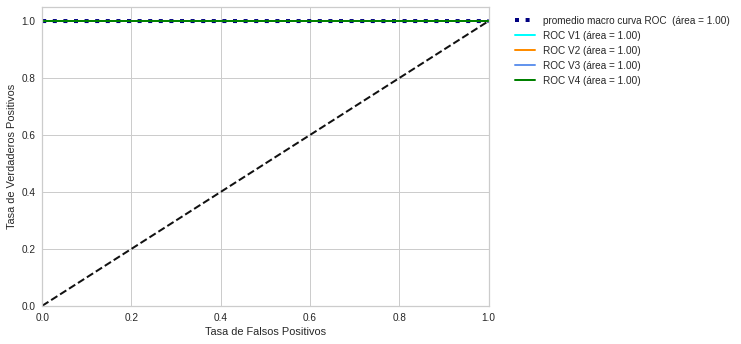

In [ ]:
i=0
cvA = StratifiedShuffleSplit(n_splits=10, random_state=42)
crossVA = cvA.split(XA,YA)
for train_index, test_index in crossVA:
  Modelo_rf_91_A = RandomForestClassifier(criterion='entropy',max_depth= 20, n_estimators = 150 ,random_state = 42)
  if i == 0:
    Modelo_rf_91_A.fit(XA[train_index],YA[train_index])
    pred_model_rf_91_A =  Modelo_rf_91_A.predict_proba(XA[test_index])
    print("\t\t\t K="+str(i))
    plotAucRoc(Y_AUCROC[test_index],pred_model_rf_91_A,4)
    print("\n\n")
  i+=1

			 K=9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  del sys.path[0]


IndexError: ignored

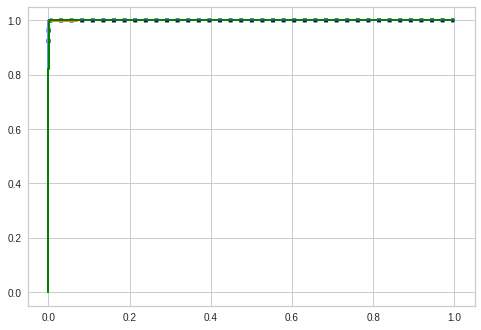

In [ ]:
i=0
cvA = StratifiedShuffleSplit(n_splits=10, random_state=42)
crossVA = cvA.split(XA,YA)
for train_index, test_index in crossVA:
  Modelo_rf_91_A = RandomForestClassifier(criterion=paramRFA['criterion'],max_depth= paramRFA['max_depth'], n_estimators = paramRFA['n_estimators'] ,random_state = 42)
  if i == 9:
    Modelo_rf_91_A.fit(XA[train_index],YA[train_index])
    pred_model_rf_91_A =  Modelo_rf_91_A.predict_proba(XA[test_index])
    print("\t\t\t K="+str(i))
    plotAucRoc(YA_AUCROC[test_index],pred_model_rf_91_A,4)
    print("\n\n")
  i+=1

#### Curvas de validación

In [ ]:
Modelo_rf_91_Curva = RandomForestClassifier(criterion=paramRFA['criterion'], n_estimators = paramRFA['n_estimators'] ,random_state = 42)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f11ce50f710>,
                cv=10, groups=None, logx=False, model=None, n_jobs=-1,
                param_name='max_depth',
                param_range=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                pre_dispatch='all', scoring='accuracy')

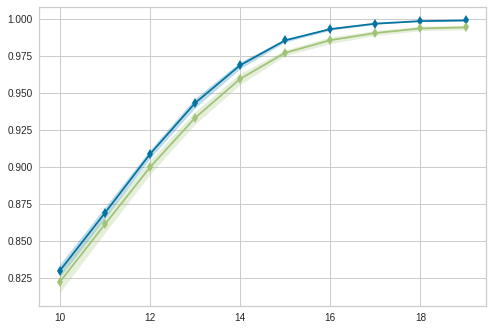

In [ ]:
viz = ValidationCurve(Modelo_rf_91_Curva, param_name="max_depth", n_jobs=-1,
                      param_range=np.arange(10, 20), cv=10, scoring="accuracy")

# Fit and show the visualizer
viz.fit(XA, YA)


# **MLP A**

### GridSearch 80-20

In [ ]:
MLP_91_A = make_pipeline(StandardScaler(),MLPClassifier(random_state = 42))

gs_MLP_91_A = GridSearchCV(estimator=MLP_91_A,param_grid=param_grid_mlp_NEW,scoring='accuracy',cv=5,n_jobs=-1)
start_time = time()
gs_MLP_91_A = gs_MLP_91_A.fit(x_trainA, y_trainA)
elapsed_time = time() - start_time
print("Tiempo transcurrido: %0.10f segundos." % elapsed_time)
print(gs_MLP_91_A.best_score_)
print(gs_MLP_91_A.best_params_)
paramMLPA = gs_MLP_91_A.best_params_

In [ ]:
paramMLPA = {'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.001, 'mlpclassifier__hidden_layer_sizes': (200,), 'mlpclassifier__max_iter': 1000, 'mlpclassifier__solver': 'adam'}

In [ ]:
pred_MLP_Grid_91_A = gs_MLP_91_A.predict(x_testA)
Metrics(y_testA.astype(int),pred_MLP_Grid_91_A.astype(int),4)

####  Cross_Validate

In [ ]:
#### cv = 10  100%
cvA = StratifiedShuffleSplit(n_splits=10, random_state=42)
crossVA = cvA.split(XA,YA)
kf_MLP_91_A =  make_pipeline(StandardScaler(),MLPClassifier(alpha=paramMLPA['mlpclassifier__alpha'], hidden_layer_sizes=paramMLPA['mlpclassifier__hidden_layer_sizes'],activation=paramMLPA['mlpclassifier__activation'],max_iter=paramMLPA['mlpclassifier__max_iter'],solver=paramMLPA['mlpclassifier__solver'],random_state = 42))
start_time = time()
scores = cross_validate(estimator=kf_MLP_91_A ,X=XA,y=YA, scoring = scoring, return_estimator= True ,cv=crossVA,n_jobs=-1)
elapsed_time = time() - start_time
print("Tiempo transcurrido: %0.10f segundos." % elapsed_time)
#print('CV scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_acc_weighted']),np.std(scores['test_acc_weighted'])))
print('CV f1: %.3f +/- %.3f' % (np.mean(scores['test_f1_weighted']),np.std(scores['test_f1_weighted'])))
print('CV prec: %.3f +/- %.3f' % (np.mean(scores['test_prec_weighted']),np.std(scores['test_prec_weighted'])))
print('CV rec: %.3f +/- %.3f' % (np.mean(scores['test_rec_weighted']),np.std(scores['test_rec_weighted'])))
print("\n\t\tAccuracy\n")
print(scores['test_acc_weighted'])
print("\n\t\t F1 \n")
print(scores['test_f1_weighted'])
print("\n\t\t Prec \n")
print(scores['test_prec_weighted'])
print("\n\t\t Rec \n")
print(scores['test_rec_weighted'])

Tiempo transcurrido: 5276.1150338650 segundos.
CV accuracy: 0.862 +/- 0.007
CV f1: 0.863 +/- 0.007
CV prec: 0.864 +/- 0.007
CV rec: 0.862 +/- 0.007

		Accuracy

[0.862      0.87144444 0.85066667 0.85077778 0.87055556 0.87111111
 0.866      0.85844444 0.85933333 0.86322222]

		 F1 

[0.86236108 0.87177462 0.85155009 0.85080228 0.87059364 0.87092718
 0.86622874 0.85916591 0.85955281 0.86328115]

		 Prec 

[0.86478469 0.87329073 0.85385733 0.85175412 0.87156097 0.87209742
 0.86721659 0.86116314 0.8621357  0.86392099]

		 Rec 

[0.862      0.87144444 0.85066667 0.85077778 0.87055556 0.87111111
 0.866      0.85844444 0.85933333 0.86322222]


In [ ]:
modelsMLP_A = scores['estimator']

for i in range(len(modelsMLP_A)):
  pred_model_MLP_CV_A =  modelsMLP_A[i].predict(XA_TS)
  print("\t\t\t K="+str(i))
  Metrics(YA_TS.astype(int),pred_model_MLP_CV_A.astype(int),4)
  print("\n\n")

#### Modelo

In [ ]:
Modelo_mlp_91_A =  make_pipeline(StandardScaler(),MLPClassifier(alpha=paramMLPA['mlpclassifier__alpha'], hidden_layer_sizes=paramMLPA['mlpclassifier__hidden_layer_sizes'],activation=paramMLPA['mlpclassifier__activation'],max_iter=paramMLPA['mlpclassifier__max_iter'],solver=paramMLPA['mlpclassifier__solver'],random_state = 42))
Modelo_mlp_91_A.fit(X=x_trainA,y=y_trainA)
pred_model_mlp_91_A =  Modelo_mlp_91_A.predict(x_testA)
Metrics(y_testA.astype(int),pred_model_mlp_91_A.astype(int),n=4)

#### Modelo Manual

In [ ]:
alpha_AB =
hidden_layer_sizes_AB =
activation_AB =
max_iter_AB =
solver_AB =

In [ ]:
Modelo_mlp_91_A =  make_pipeline(StandardScaler(),MLPClassifier(alpha=alpha_AB, hidden_layer_sizes=hidden_layer_sizes_AB,activation=activation_AB,max_iter=max_iter_AB,solver=solver_AB,random_state = 42))
Modelo_mlp_91_A.fit(X=x_trainA,y=y_trainA)
pred_model_mlp_91_A =  Modelo_mlp_91_A.predict(x_testA)
Metrics(y_testA.astype(int),pred_model_mlp_91_A.astype(int),n=4)

# **MLP Libro**

In [ ]:
 from sklearn.datasets import fetch_openml

In [ ]:
import numpy as np
import sys


class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_hidden : int (default: 30)
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatch_size : int (default: 1)
        Number of training examples per minibatch.
    seed : int (default: None)
        Random seed for initializing weights and shuffling.

    Attributes
    -----------
    eval_ : dict
      Dictionary collecting the cost, training accuracy,
      and validation accuracy for each epoch during training.

    """
    def __init__(self, n_hidden=30,
                 l2=0., epochs=100, eta=0.001,
                 shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_examples]
            Target values.
        n_classes : int
            Number of classes

        Returns
        -----------
        onehot : array, shape = (n_examples, n_labels)

        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):
        """Compute forward propagation step"""

        # step 1: net input of hidden layer
        # [n_examples, n_features] dot [n_features, n_hidden]
        # -> [n_examples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # step 2: activation of hidden layer
        a_h = self._sigmoid(z_h)

        # step 3: net input of output layer
        # [n_examples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_examples, n_classlabels]

        z_out = np.dot(a_h, self.w_out) + self.b_out

        # step 4: activation output layer
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, shape = (n_examples, n_labels)
            one-hot encoded class labels.
        output : array, shape = [n_examples, n_output_units]
            Activation of the output layer (forward propagation)

        Returns
        ---------
        cost : float
            Regularized cost

        """
        L2_term = (self.l2 *
                   (np.sum(self.w_h ** 2.) +
                    np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term

        # If you are applying this cost function to other
        # datasets where activation
        # values maybe become more extreme (closer to zero or 1)
        # you may encounter "ZeroDivisionError"s due to numerical
        # instabilities in Python & NumPy for the current implementation.
        # I.e., the code tries to evaluate log(0), which is undefined.
        # To address this issue, you could add a small constant to the
        # activation values that are passed to the log function.
        #
        # For example:
        #
        # term1 = -y_enc * (np.log(output + 1e-5))
        # term2 = (1. - y_enc) * np.log(1. - output + 1e-5)

        return cost

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_examples, n_features]
            Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_examples]
            Predicted class labels.

        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights from training data.

        Parameters
        -----------
        X_train : array, shape = [n_examples, n_features]
            Input layer with original features.
        y_train : array, shape = [n_examples]
            Target class labels.
        X_valid : array, shape = [n_examples, n_features]
            Sample features for validation during training
        y_valid : array, shape = [n_examples]
            Sample labels for validation during training

        Returns:
        ----------
        self

        """
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]

        ########################
        # Weight initialization
        ########################

        # weights for input -> hidden
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))

        # weights for hidden -> output
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs))  # for progress formatting
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # iterate over training epochs
        for i in range(self.epochs):

            # iterate over minibatches
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # forward propagation
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ##################
                # Backpropagation
                ##################

                # [n_examples, n_classlabels]
                delta_out = a_out - y_train_enc[batch_idx]

                # [n_examples, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)

                # [n_examples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_examples, n_hidden]
                delta_h = (np.dot(delta_out, self.w_out.T) *
                           sigmoid_derivative_h)

                # [n_features, n_examples] dot [n_examples, n_hidden]
                # -> [n_features, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, delta_h)
                grad_b_h = np.sum(delta_h, axis=0)

                # [n_hidden, n_examples] dot [n_examples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, delta_out)
                grad_b_out = np.sum(delta_out, axis=0)

                # Regularization and weight updates
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h # bias is not regularized
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out  # bias is not regularized
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out

            #############
            # Evaluation
            #############

            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)

            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) /
                         X_valid.shape[0])

            sys.stderr.write('\r%0*d/%d | Cost: %.2f '
                             '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self

Hiperparámetros seleccionados de MLP A

In [ ]:
y_trainA.astype(int)
y_testA.astype(int)

array([1, 4, 3, ..., 2, 3, 2])

In [ ]:
y_trainA_91_MLPHand =y_trainA - 1
y_testA_91_MLPHand =y_testA - 1

In [ ]:
scaler = StandardScaler()
print(scaler.fit(x_testA))
x_testA_91_MLPHand = scaler.transform(x_testA)
print(np.amax(x_testA))
print(np.amax(x_testA_91_MLPHand))
print(scaler.fit(x_testA))
x_trainA_91_MLPHand = scaler.transform(x_trainA)
print(np.amax(x_trainA))
print(np.amax(x_trainA_91_MLPHand))

StandardScaler(copy=True, with_mean=True, with_std=True)
4.67762895432193
5.361697024260378
StandardScaler(copy=True, with_mean=True, with_std=True)
4.67762895432193
6.143747366896921


In [ ]:
paramMLPA = {'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.001, 'mlpclassifier__hidden_layer_sizes': (200,), 'mlpclassifier__max_iter': 1000, 'mlpclassifier__solver': 'adam'}

In [ ]:
n_epochs = paramMLPA['mlpclassifier__max_iter']
nn = NeuralNetMLP(n_hidden=200,
                  l2=paramMLPA['mlpclassifier__alpha'],
                  epochs=paramMLPA['mlpclassifier__max_iter'],
                  eta=0.0005,
                  minibatch_size=100,
                  shuffle=True,
                  seed=42)

nn.fit(X_train=x_trainA_91_MLPHand,
       y_train=y_trainA_91_MLPHand,
       X_valid=x_testA_91_MLPHand,
       y_valid=y_testA_91_MLPHand)

1000/1000 | Cost: 39686.66 | Train/Valid Acc.: 82.17%/82.08% 

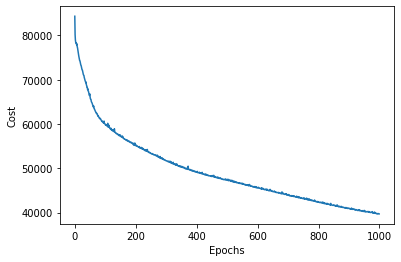

In [ ]:
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
#plt.savefig('images/12_07.png', dpi=300)
plt.show()

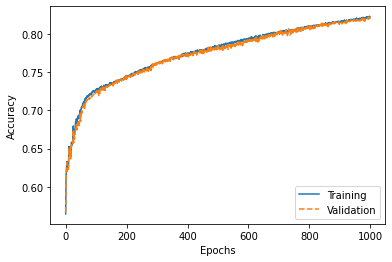

In [ ]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'],
         label='Training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'],
         label='Validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
#plt.savefig('images/12_08.png', dpi=300)
plt.show()

In [ ]:
y_predict_Hand= nn.predict(x_testA_91_MLPHand)
acc = (np.sum(y_predict_Hand == y_testA_91_MLPHand).astype(np.float) / x_testA_91_MLPHand.shape[0])

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 82.08%
